In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import local_binary_pattern

In [2]:
base_dir = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"

In [3]:
subdirs = os.listdir(base_dir)
class_names = sorted(subdirs)

In [4]:
img_size = (224, 224)

In [5]:
batch_size = 32

In [6]:
# n_estimators = 100
max_depth = 10
min_samples_split = 2
# random_state = 42

In [7]:
  def extract_features(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(img, P=8, R=3)
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
        features = hist.astype("float")
        features /= (np.sum(features) + 1e-7)
        return features

In [8]:
X = []
y = []
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        features = extract_features(img_path)
        X.append(features)
        y.append(class_index)
      
        
X = np.array(X)
y = np.array(y)

In [9]:
print(X.shape)
print(y.shape)

(1838, 255)
(1838,)


In [10]:
train_indices = np.random.choice(len(X), size=int(0.9*len(X)), replace=False)
valid_indices = np.setdiff1d(np.arange(len(X)), train_indices)

In [11]:
X_train, y_train = X[train_indices], y[train_indices]
X_valid, y_valid = X[valid_indices], y[valid_indices]

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape) 

(1654, 255)
(1654,)
(184, 255)
(184,)


In [13]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42,max_depth = 10,min_samples_split = 2,max_features= 'auto')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [14]:
val_accuracy = rf.score(X_valid, y_valid)
print('Validation accuracy:', val_accuracy)

Validation accuracy: 0.3858695652173913


In [15]:
params = rf.get_params()
params


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Define the test directory
test_dir = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"


In [17]:
# Get the list of subdirectories in the test directory
test_subdirs = os.listdir(test_dir)

# Define the list of class names in the dataset
class_names = sorted(test_subdirs)

In [18]:
# Define the list to store the predicted class labels
predictions = []
true_labels = []

In [19]:
# Loop over each class directory in the test directory
for class_dir in test_subdirs:
    class_index = class_names.index(class_dir)
    for img_name in os.listdir(os.path.join(test_dir, class_dir)):
        # Load the image and extract features
        img_path = os.path.join(test_dir, class_dir, img_name)
        features = extract_features(img_path)
        
        # Use the classifier to predict the class label
        pred = rf.predict([features])[0]
        predictions.append(pred)
        true_labels.append(class_index)

In [20]:
# Convert the predicted class labels to class names
predicted_class_names = [class_names[pred] for pred in predictions]

In [21]:
# Print the accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names, zero_division=0)
print(f'Accuracy: {test_accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.3770833333333333
Classification Report:
              precision    recall  f1-score   support

       Adult       0.12      0.03      0.05        30
    Airplane       0.44      0.70      0.54        30
      Alpaca       0.28      0.37      0.31        30
        Bird       0.64      0.23      0.34        30
         Bus       0.50      0.90      0.64        30
         Car       0.18      0.07      0.10        30
         Cat       0.20      0.30      0.24        30
       Child       0.50      0.07      0.12        30
    Elephant       0.44      0.40      0.42        30
      Flower       0.37      0.47      0.41        30
     Giraffe       0.53      0.30      0.38        30
       Horse       0.32      0.40      0.35        30
      Monkey       0.23      0.30      0.26        30
       Panda       0.35      0.53      0.42        30
     Reptile       0.50      0.30      0.37        30
      Vessel       0.54      0.67      0.60        30

    accuracy                

In [22]:
print(predictions)

[11, 12, 9, 6, 1, 6, 6, 0, 8, 13, 12, 9, 13, 6, 2, 8, 6, 4, 13, 6, 6, 11, 6, 1, 12, 9, 11, 12, 12, 9, 15, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 15, 1, 2, 9, 4, 1, 1, 1, 9, 9, 1, 1, 1, 1, 1, 3, 10, 2, 8, 10, 2, 2, 4, 4, 14, 2, 15, 10, 13, 2, 11, 2, 8, 14, 14, 11, 14, 13, 2, 8, 2, 2, 14, 2, 2, 8, 12, 1, 6, 9, 6, 3, 3, 3, 11, 6, 1, 3, 11, 6, 6, 1, 6, 1, 3, 11, 2, 15, 1, 9, 3, 9, 3, 9, 6, 1, 4, 4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 15, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 15, 5, 15, 1, 2, 4, 1, 15, 1, 15, 15, 1, 11, 1, 1, 11, 11, 1, 4, 11, 2, 15, 4, 4, 4, 15, 5, 1, 4, 0, 12, 6, 14, 13, 13, 6, 13, 12, 4, 13, 6, 6, 12, 5, 12, 6, 6, 6, 13, 9, 9, 2, 12, 6, 13, 0, 6, 12, 2, 6, 11, 13, 12, 7, 6, 6, 1, 9, 11, 0, 11, 6, 6, 13, 12, 6, 4, 2, 11, 10, 12, 6, 7, 13, 2, 0, 0, 1, 11, 2, 2, 4, 2, 8, 5, 15, 13, 8, 8, 8, 8, 5, 2, 5, 12, 8, 13, 8, 13, 8, 5, 8, 6, 10, 8, 8, 8, 4, 13, 9, 12, 12, 12, 6, 9, 9, 6, 9, 12, 9, 11, 6, 14, 1, 1, 9, 11, 13, 9, 9, 9, 9, 12, 9, 9, 9, 6, 9, 12, 10, 15, 8, 15

In [23]:
print(true_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [24]:
test_class_names = []

# Loop over each class directory in the test directory
for class_dir in test_subdirs:
    # Loop over each image in the class directory
    for img_name in os.listdir(os.path.join(test_dir, class_dir)):
        # Add the image name to the list
        test_class_names.append(img_name)

# Print the list of image names
print(test_class_names)

['test_adult (1).jpg', 'test_adult (10).jpg', 'test_adult (11).jpg', 'test_adult (12).jpg', 'test_adult (13).jpg', 'test_adult (14).jpg', 'test_adult (15).jpg', 'test_adult (16).jpg', 'test_adult (17).jpg', 'test_adult (18).jpg', 'test_adult (19).jpg', 'test_adult (2).jpg', 'test_adult (20).jpg', 'test_adult (21).jpg', 'test_adult (22).jpg', 'test_adult (23).jpg', 'test_adult (24).jpg', 'test_adult (25).jpg', 'test_adult (26).jpg', 'test_adult (27).jpg', 'test_adult (28).jpg', 'test_adult (29).jpg', 'test_adult (3).jpg', 'test_adult (30).jpg', 'test_adult (4).jpg', 'test_adult (5).jpg', 'test_adult (6).jpg', 'test_adult (7).jpg', 'test_adult (8).jpg', 'test_adult (9).jpg', 'test_airplane (1).jpg', 'test_airplane (10).jpg', 'test_airplane (11).jpg', 'test_airplane (12).jpg', 'test_airplane (13).jpg', 'test_airplane (14).jpg', 'test_airplane (15).jpg', 'test_airplane (16).jpg', 'test_airplane (17).jpg', 'test_airplane (18).jpg', 'test_airplane (19).jpg', 'test_airplane (2).jpg', 'test_ai

In [28]:
import pandas as pd

# Create a dictionary that maps column names to the corresponding lists
data = {'GIVEN TEST IMG': test_class_names, 'GIVEN TEST CLASS': true_labels, 'PREDICTED CLASS':predictions }

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
df.to_csv("Random final.csv", index=False)

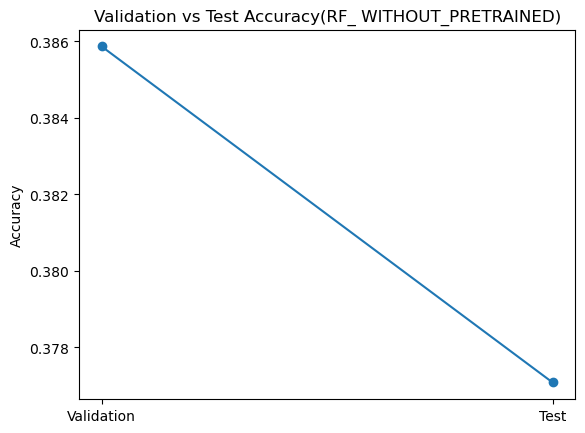

In [29]:
import matplotlib.pyplot as plt

plt.plot([1, 2], [val_accuracy, test_accuracy], marker='o')
plt.xticks([1, 2], ['Validation', 'Test'])
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy(RF_ WITHOUT_PRETRAINED)')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(true_labels, predictions)
print(cm)

[[ 1  2  1  0  1  0  8  0  2  4  0  3  5  3  0  0]
 [ 0 21  1  1  1  0  0  0  0  3  0  0  0  0  0  3]
 [ 0  0 11  0  2  0  0  0  4  0  3  2  0  2  5  1]
 [ 0  6  1  7  0  0  7  0  0  4  0  3  1  0  0  1]
 [ 1  0  1  0 27  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  8  2  0  7  2  0  0  0  0  0  4  0  0  0  7]
 [ 2  0  2  0  1  1  9  0  0  2  0  0  6  6  1  0]
 [ 3  2  2  0  1  0  7  2  0  1  1  5  3  3  0  0]
 [ 0  0  4  0  2  4  1  0 12  0  1  0  1  4  0  1]
 [ 0  2  0  0  0  0  4  0  0 14  0  2  6  1  1  0]
 [ 0  0  1  2  7  0  0  0  5  0  9  1  2  1  0  2]
 [ 0  0  7  0  1  3  0  0  1  0  1 12  2  3  0  0]
 [ 1  1  2  0  0  0  3  1  1  3  0  2  9  5  1  1]
 [ 0  0  1  0  1  0  1  1  1  0  1  4  3 16  1  0]
 [ 0  0  4  0  0  1  4  0  1  7  1  0  1  2  9  0]
 [ 0  6  0  1  3  0  0  0  0  0  0  0  0  0  0 20]]
